## Clustering - finding groups of similar objects

Clustering methods:
- k-means
- hierarchial clustering
- gaussian mixtures
- DBSCAN

### K-means:

K-means find the the cluster centers by minimizing the intertia (withing cluster sum of squares)

ineritia = sum of squared distances of samples to their closest cluster center

intertia (function) = $\sum_{i=1}^{n}\sum_{x_j \in C_i} (dist(x_j, \mu_i))^2$

where $x_j$ is a sample in cluster $C_i$ and $\mu_i$ is the center of cluster $C_i$

Small inertia means dense clusters

Steps:
1. Choose the number of clusters
2. Randomly assign each point to a cluster
3. Until clusters stop changing, repeat the following:
    - For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster
    - Assign each data point to the cluster for which the centroid is the closest


We can use the elbow method to find the optimal number of clusters.  The elbow method plots the inertia as a function of the number of clusters.  The elbow in the plot is the optimal number of clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

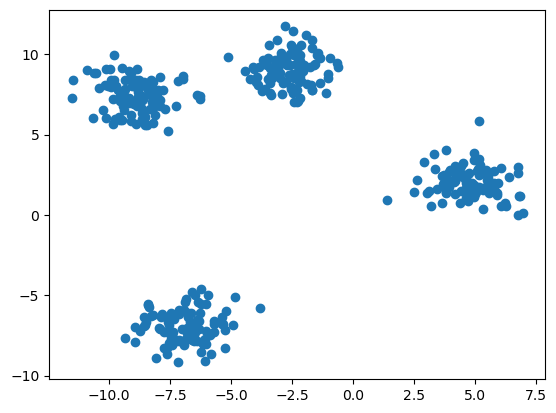

In [2]:
# toy example - 4 clusters
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1, random_state=42)

# plot
plt.scatter(X[:,0], X[:,1])#, c=y)
plt.show()

In [3]:
from sklearn.cluster import KMeans

# choose number of clusters
k = 4
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [4]:
# cluster centers
centers = km.cluster_centers_
centers

array([[ 4.74710337,  2.01059427],
       [-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [-8.92921104,  7.38196067]])

In [5]:
# cluster
labels = km.labels_
labels

array([3, 1, 3, 0, 0, 1, 1, 3, 1, 0, 3, 0, 3, 0, 2, 2, 2, 1, 0, 2, 0, 3,
       1, 0, 1, 3, 2, 1, 2, 3, 3, 0, 3, 3, 1, 2, 0, 0, 1, 2, 1, 3, 3, 2,
       0, 0, 1, 2, 1, 0, 1, 3, 2, 0, 0, 3, 0, 1, 3, 0, 2, 0, 3, 2, 1, 1,
       2, 2, 2, 3, 1, 2, 3, 0, 3, 1, 3, 2, 1, 1, 2, 1, 3, 3, 2, 0, 3, 2,
       1, 2, 0, 1, 3, 2, 0, 3, 3, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1,
       1, 3, 0, 0, 3, 3, 3, 0, 3, 1, 2, 0, 3, 1, 3, 2, 2, 0, 2, 1, 1, 1,
       2, 3, 2, 3, 1, 2, 1, 2, 1, 2, 2, 0, 1, 3, 2, 1, 3, 0, 3, 1, 2, 0,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2, 0,
       0, 1, 0, 3, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 3, 3, 0, 2, 2, 3, 2,
       3, 3, 0, 1, 2, 1, 1, 0, 3, 1, 3, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0,
       2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 3, 3, 2, 3, 3, 0, 2, 1, 1,
       3, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 3, 1, 0, 0, 3,
       3, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 3, 1, 0, 2, 3, 1, 1,
       3, 3, 3, 0, 0, 3, 0, 0, 2, 3, 1, 1, 0, 3, 3,

In [6]:
# # plotting clusters loop
# for i in range(k):
#     plt.scatter(X[labels==i,0], X[labels==i,1])
#     plt.scatter(centers[i,0], centers[i,1], marker='*', s=200, c='k')
# plt.show()

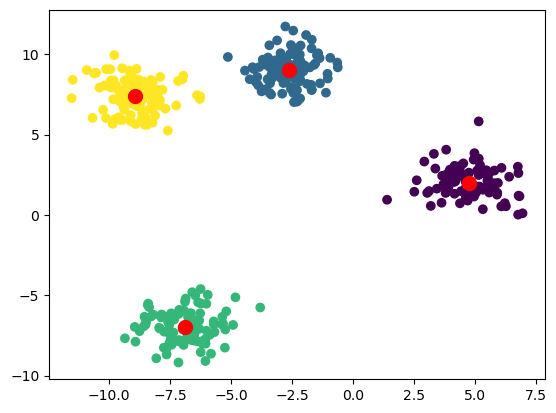

In [7]:
# plot clusters
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

#### Finding the optimal number of clusters

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


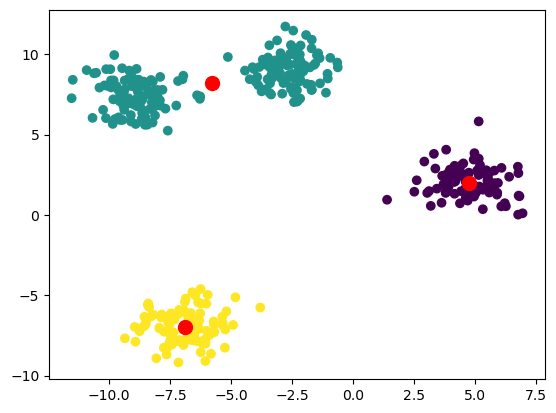

In [8]:
k = 3
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)
labels = km.labels_
centers = km.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

The elbow method:

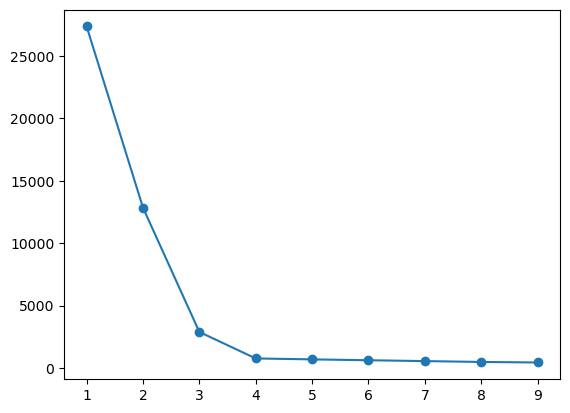

In [9]:
# Elbow method

inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)
plt.plot(range(1,10), inertias, marker='o')
plt.show()

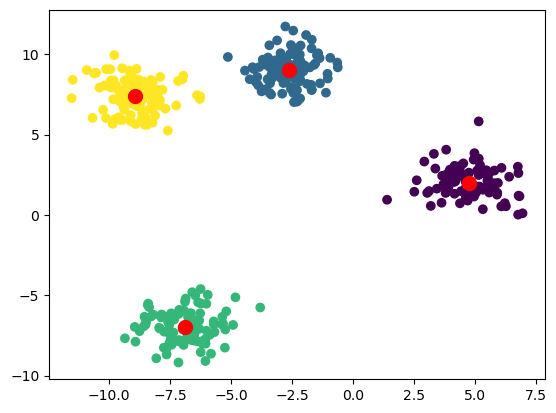

In [10]:
# set the number of clisters to the optimal value from the elbow method
km.n_clusters = 4
km.fit(X)
labels = km.labels_
centers = km.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

In [11]:
def plot_decision_regions(model,X):
    
    # extract feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
    except:
        print('something went wrong...')
        
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #  assign grid points to clusters
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot Voronoi regions
    plt.contourf(Z, extent=(x_min,x_max,y_min,y_max),cmap='Pastel2_r')
    plt.contour(Z, extent=(x_min,x_max,y_min,y_max),linewidths=1,colors='k')
    
    # plot data
    plt.scatter(X[:,0],X[:,1],color='k',s=15)

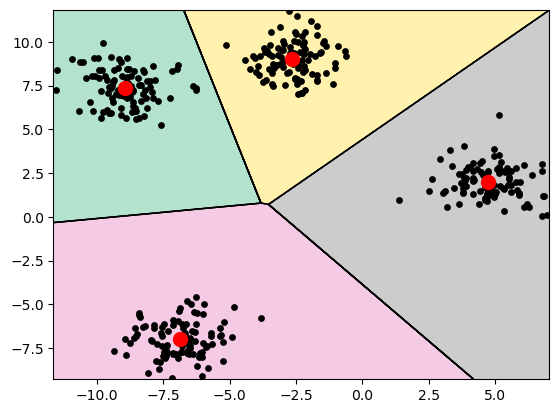

In [12]:
plot_decision_regions(km,X)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

In [13]:
centers

array([[ 4.74710337,  2.01059427],
       [-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [-8.92921104,  7.38196067]])

In [14]:
new_points = np.array([
    [-5,-5],
    [-7,5],
    [5,0],
    [0,10]
])

# predict new points
km.predict(new_points)

array([2, 3, 0, 1], dtype=int32)

### Clustering Metrics:

(i) Inertia: sum of squared distances of samples to their closest cluster center
$$\sum_{i=1}^{n}\sum_{x_j \in C_i} (dist(x_j, \mu_i))^2$$

We can plot the inertia as a function of the number of clusters.  The elbow in the plot is the optimal number of clusters.

(ii) Silhouette Score: measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation)

(iii) Silhouette Coefficient: measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation)
$$s = \frac{b - a}{max(a, b)}$$

where $a$ is the mean distance between a sample and all other points in the same class and $b$ is the mean distance between a sample and all other points in the next nearest cluster.

For a data point x in cluster i:
We compute:
a = average distance from x to all other points in the same cluster
= $\frac{1}{|C_i| - 1} \sum_{x_j \in C_i, x_j \neq x} dist(x, x_j)$

b = average distance from x to all other points in the nearest cluster
= $\frac{1}{|C_j|} \sum_{x_j \in C_j} dist(x, x_j)$

s = silhouette coefficient for x
= $\frac{b - a}{max(a, b)}$

s is in the range [-1, 1] (when b >> a, s ~ 1; when a >> b, s ~ -1; when a ~ b, s ~ 0)

#### Silhouette Score / Coefficients

In [15]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
silhouette_score(X, labels)

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7935062634483048

In [20]:
silhouette_samples(X, labels)

array([0.69175086, 0.39125799, 0.81094765, 0.86744598, 0.8318664 ,
       0.76923646, 0.81311788, 0.75538363, 0.8136618 , 0.81451541,
       0.79962636, 0.84101471, 0.41091274, 0.83309106, 0.90754116,
       0.9081405 , 0.89694868, 0.81079986, 0.83031191, 0.80138447,
       0.81858076, 0.73649395, 0.79885689, 0.59637381, 0.81534573,
       0.79478213, 0.81674299, 0.79176562, 0.8809853 , 0.78897839,
       0.74260569, 0.84982931, 0.68668147, 0.75634989, 0.79901363,
       0.88631591, 0.81999592, 0.81940318, 0.65078092, 0.82258429,
       0.77211598, 0.75284242, 0.7643847 , 0.89844269, 0.85057286,
       0.86938715, 0.79076834, 0.87295053, 0.77220792, 0.72601703,
       0.79275647, 0.67334071, 0.86007464, 0.8475411 , 0.8619248 ,
       0.77376979, 0.52748913, 0.62326576, 0.75392268, 0.87599826,
       0.85010535, 0.85491415, 0.63069268, 0.87855538, 0.74148105,
       0.75502367, 0.84666785, 0.84649923, 0.75021995, 0.73628402,
       0.72335979, 0.90398544, 0.73447361, 0.85150426, 0.71920

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

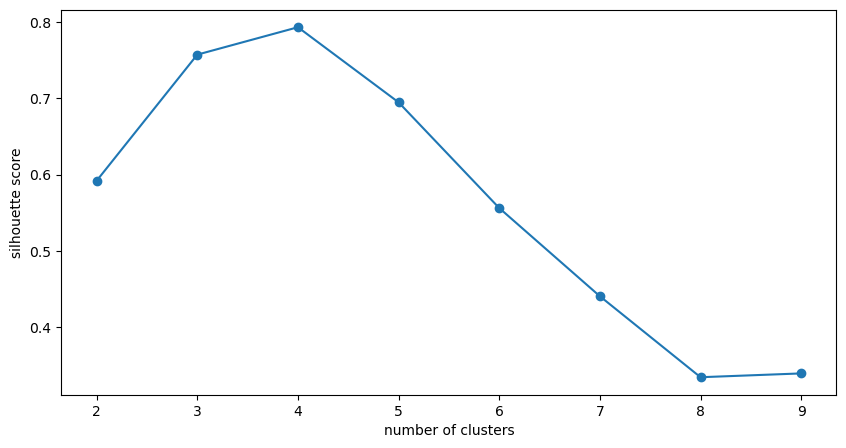

In [22]:
# plot as a function of k the silhouette score
silhouette_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    labels = km.labels_
    silhouette_scores.append(silhouette_score(X, labels))
fig = plt.figure(figsize=(10,5))
plt.plot(range(2,10), silhouette_scores, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

Silhouette Diagram:

Plot silhouette coefficients for each sample, sorted by cluster assignment and by the value of the silhouette coefficient.  The size of each bar represents the number of samples in the cluster.  The vertical dashed line indicates the average silhouette coefficient across all samples.

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the average silhouette_score is : 0.5919612444884886
For n_clusters = 3, the average silhouette_score is : 0.7575199761758081


/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the average silhouette_score is : 0.7935062634483048
For n_clusters = 5, the average silhouette_score is : 0.6949438927510669
For n_clusters = 6, the average silhouette_score is : 0.5561842825074144


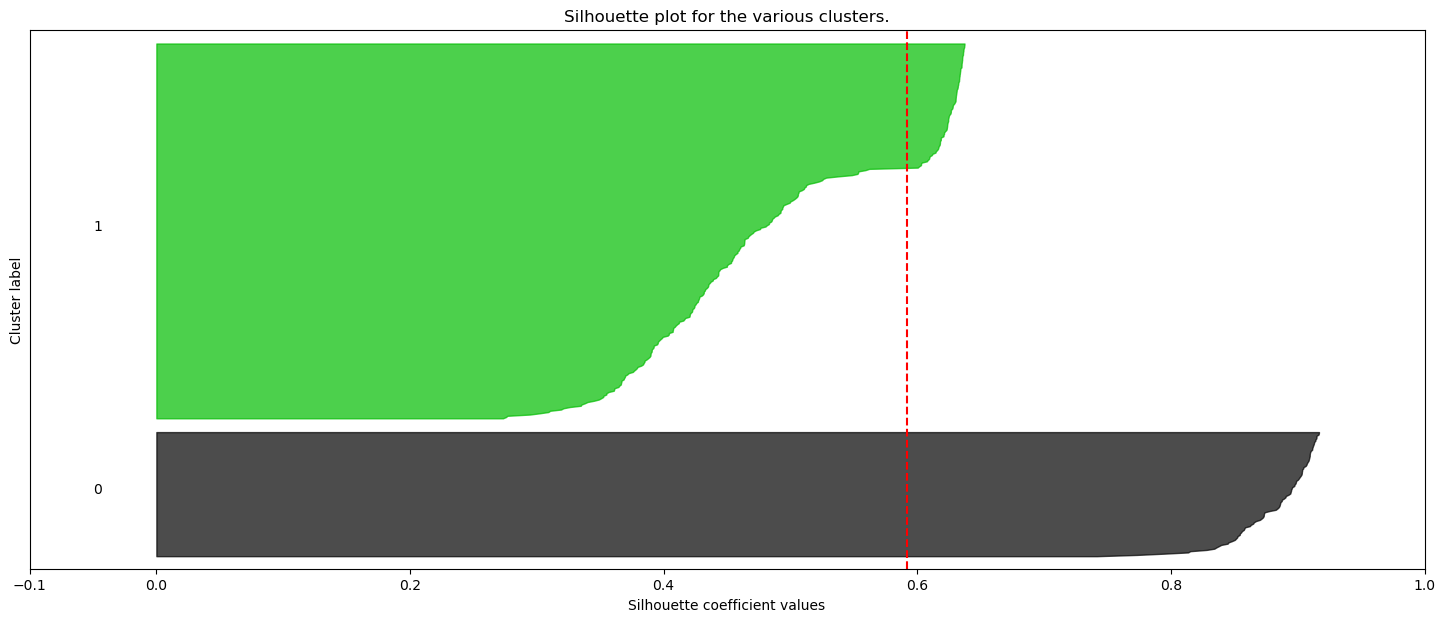

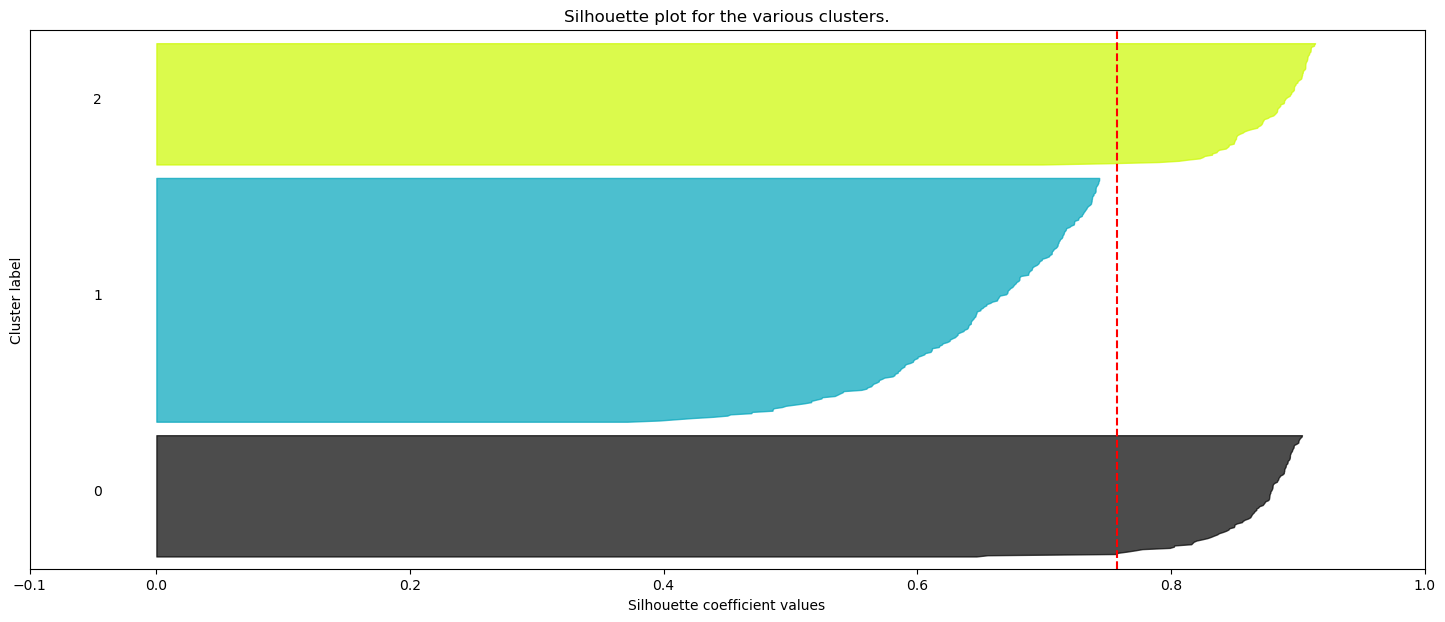

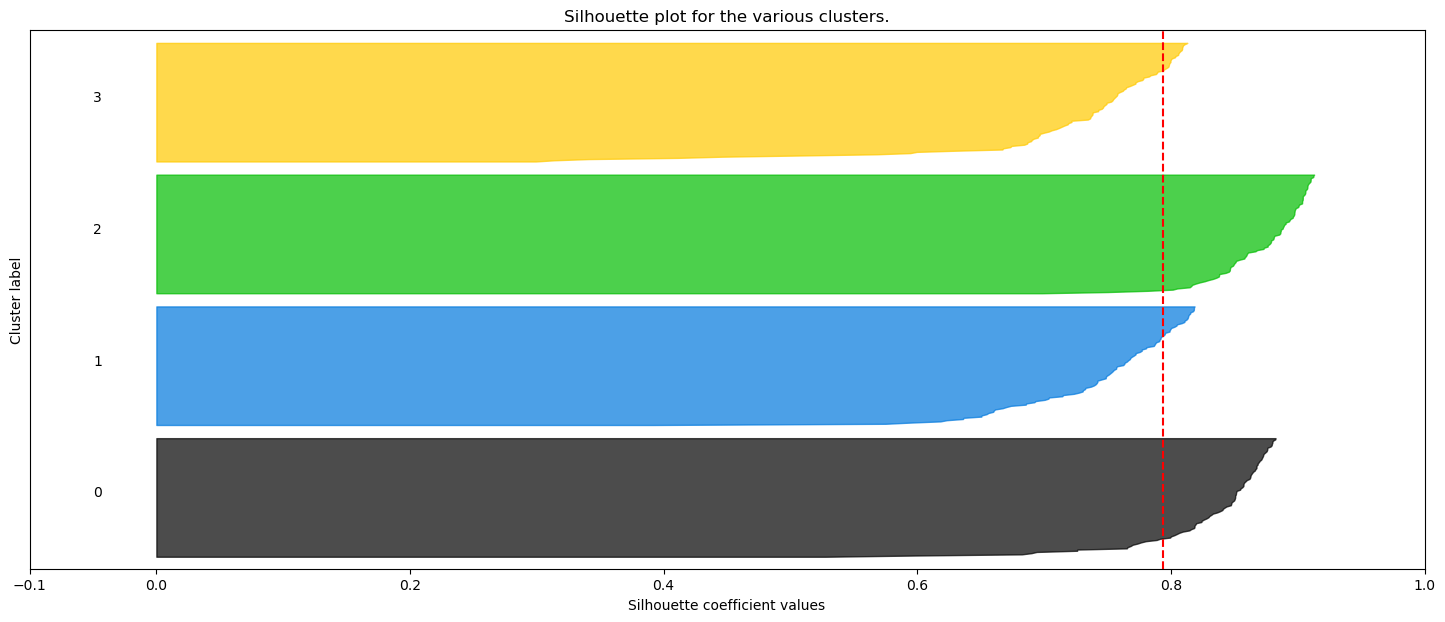

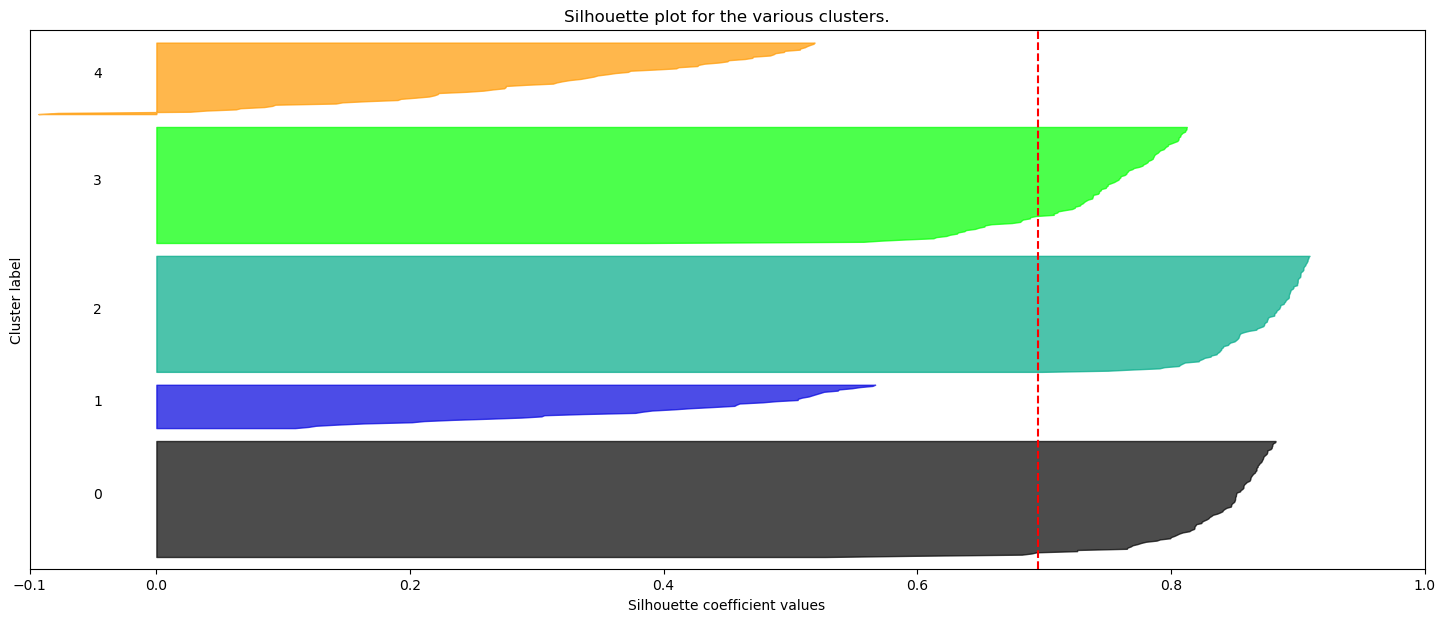

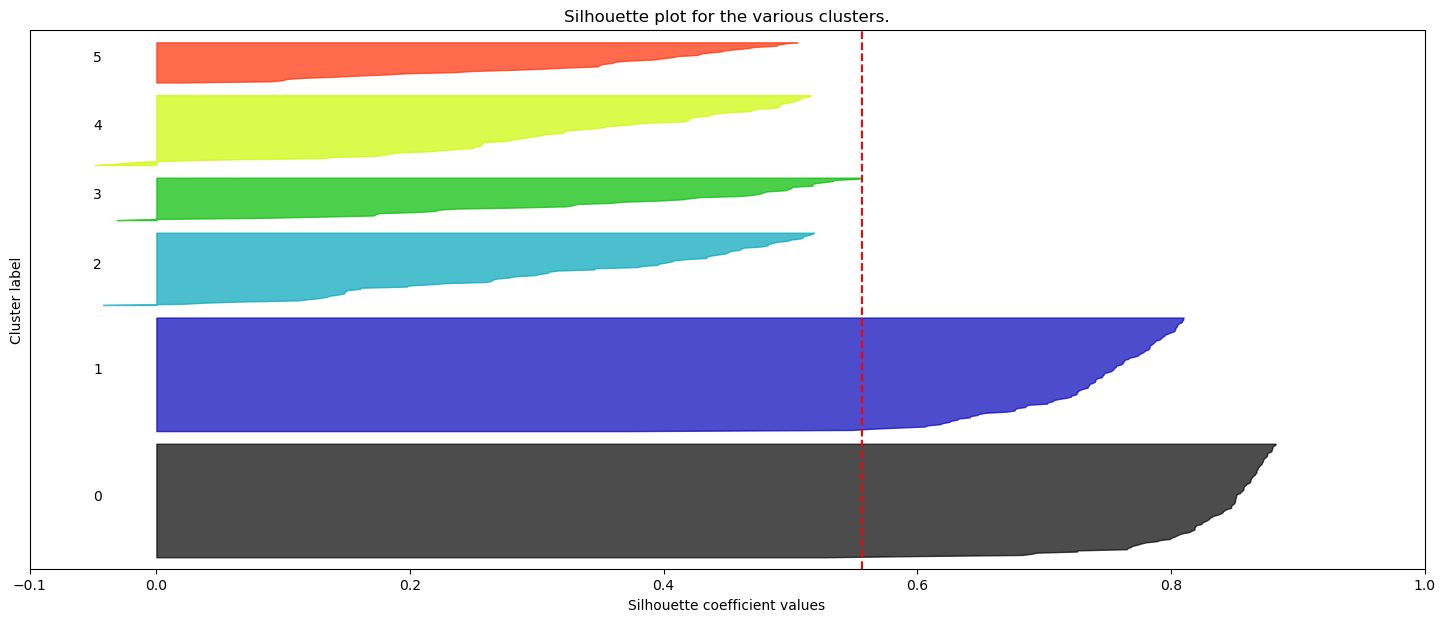

In [23]:
# silhouette diagram
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Get the number of samples belonging to cluster i
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Choose color
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Fill the silhouette diagram
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    # Plot
    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

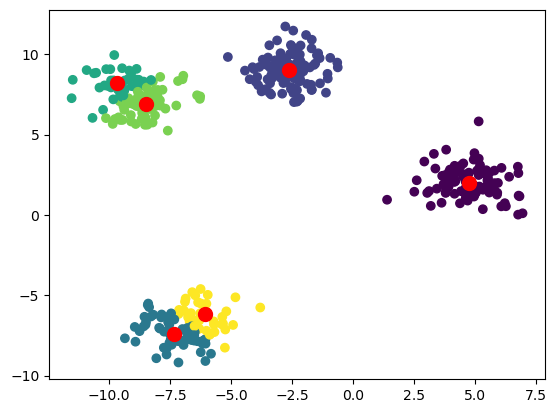

In [24]:
# show the clusters
labels = clusterer.labels_
centers = clusterer.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

#### K-means assumptions:

- clusters are isotropic (spherical) and convex (evenly sized, no weird shapes)
- clusters have similar density
- clusters have similar sizes

Example 1: unevenly sized clusters

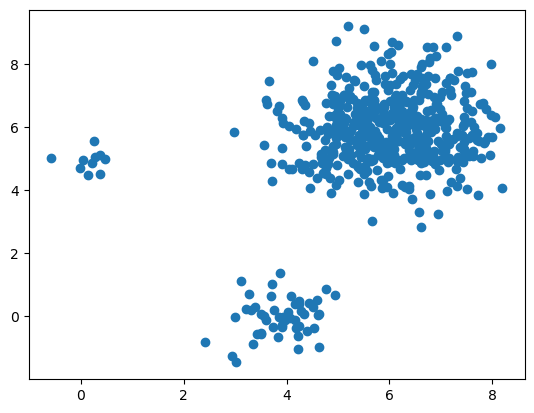

In [26]:
X = np.zeros((560,2))
X[0:500] = np.random.randn(500,2) + [6,6] # blob 1 (big)
X[500:550] = 0.7*np.random.randn(50,2) + [4,0] # blob 2 (small)
X[550:] = 0.5*np.random.randn(10,2) + [0,5] # blob 3 (small)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# use kmeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)
labels = km.labels_
centers = km.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()